# Multiple Linear Regression In-class Exercise

Before starting the lab, the following exercise will perform a simple multiple variable linear fitting on a civil engineering dataset.  In doing this exercise, you will learn to:

* Load data from a `csv` file using the `pandas` package
* Visualize relations between different variables with a scatter plot.
* Fit a multiple variable linear model using the `sklearn` package
* Evaluate the fit.

We begin by loading the packages we will need.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

## Download Data

Concrete is one of the most basic construction materials.  In this exercise, you will download a simple dataset for predicting the strength of concrete from the attributes of concrete.  The data set comes from this very nice
[kaggle competition](https://www.kaggle.com/maajdl/yeh-concret-data).  Kaggle has many excellent dataset for your project.  
You can download the data with the following command.  After running this command, you should have the file `data.csv` in your local folder.

In [2]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit03_mult_lin_reg/Concrete_Data_Yeh.csv'
fn_dst = 'data.csv'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

File data.csv downloaded


The `pandas` package has excellent methods for loading `csv` files.  YThe following command loads the `csv` file into a dataframe `df`.

In [3]:
df = pd.read_csv('data.csv')

Ues the `df.head()` to print the first few rows of the dataframe.

In [4]:
# TODO
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In this exercise, the target variable will be the concrete strength in Megapascals, `csMPa`.  We will use the other 8 attributes as predictors to predict the strength.  

Create a list called `xnames` of the 8 names of the predictors.  You can do this as follows:
* Get the list of names of the columns from `df.columns.tolist()`.  
* Remove the last items from the list using indexing.

Print the `xnames`.

In [5]:
# TODO
xnames = df.columns.tolist()
xnames = xnames[:-1]
print(xnames)

['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']


Get the data matrix `X` and target vector `y` from the dataframe `df`.  

Recall that to get the items from a dataframe, you can use syntax such as

    s = np.array(df['slag'])  
        
which gets the data in the column `slag` and puts it into an array `s`.  You can also get multiple columns with syntax like

    X12 = np.array(df['cement', 'slag'])  


In [6]:
# TODO
#    X = ...
#    y = ...
X = np.array(df[xnames])
y = np.array(df['csMPa'])


Using the subplot command, create two plots, side-by-side with:
* `y` vs. the `cement` on the left (attribute 0)
* `y` vs. the `water` on the right (attribute 3)
Label the axes and use the `plt.tight_layout()` to adjust the plots nicely at the end.

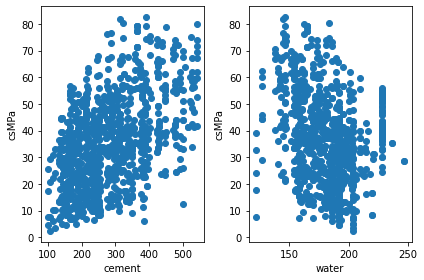

In [7]:
# TODO
Iplot = [0,3]
nplot = len(Iplot)
for i in range(nplot):
    plt.subplot(1,nplot,i+1)
    plt.plot(X[:,Iplot[i]], y, 'o')
    plt.xlabel(xnames[Iplot[i]])
    plt.ylabel('csMPa')
    
plt.tight_layout()

## Split the Data into Training and Test

Split the data into training and test.  Use 30% for test and 70% for training.  You can do the splitting manually or use the `sklearn` package `train_test_split`.   Store the training data in `Xtr,ytr` and test data in `Xts,yts`.


In [8]:
from sklearn.model_selection import train_test_split

# TODO
#  Xtr,Xts,ytr,yts = train_test_split(...)
Xtr,Xts,ytr,yts = train_test_split(X,y,test_size=0.3)

## Fit a Linear Model

Create a linear regression model object `reg` and fit the model on the training data.


In [9]:
# TODO
#   reg = ...
#   reg.fit(...)
reg = linear_model.LinearRegression()
reg.fit(Xtr,ytr)

LinearRegression()

Compute the predicted values `yhat_tr` on the training data and print the `R^2` value on the training data.

In [10]:
# TODO
#    yhat_tr = ...
#    rsq_tr = ...
yhat_tr = reg.predict(Xtr)
rsq_tr = 1-np.mean((yhat_tr-ytr)**2)/np.std(ytr)**2
print('Rsq train = %f' % rsq_tr)

Rsq train = 0.611583


Now compute the predicted values `yhat_ts` on the test data and print the `R^2` value on the test data.

In [11]:
# TODO
#    yhat_ts = ...
#    rsq_ts = ...
yhat_ts = reg.predict(Xts)
rsq_ts = 1-np.mean((yhat_ts-yts)**2)/np.std(yts)**2
print('Rsq test = %f' % rsq_ts)

Rsq test = 0.621162


Create a scatter plot of the actual vs. predicted values of `y` on the test data.

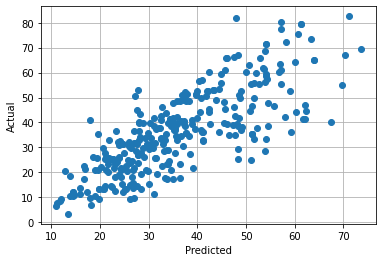

In [12]:
# TODO
plt.plot(yhat_ts, yts,'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()

## Evaluating Different Variables

One way to see the importance of different variables is to compute the *normalized* coefficients:

    coeff_norm[j]  = reg.coef_[j] * std(Xtr[:,j]) / std(ytr) 
    
which represents the change in the target for a change of one standard deviation in the attribute `j`.  The change in the target is normalized by its standard deviation.  

Compute the `coeff_norm` for the 8 attributes and plot the values using a `plt.stem()` plot.

<StemContainer object of 3 artists>

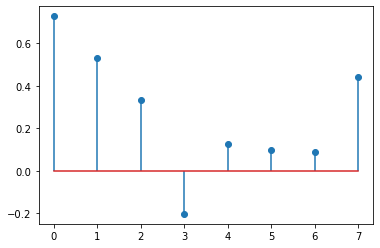

In [13]:
# TODO
coeff_norm = reg.coef_ * np.std(Xtr,axis=0) / np.std(ytr)
plt.stem(coeff_norm, use_line_collection=True)

Which variable has the highest normalized coefficient, and hence most influence on the concrete strength?

In [14]:
# TODO
im = np.argmax(np.abs(coeff_norm))
print('Highest coefficient variable is `%s`' % xnames[im])

Highest coefficient variable is `cement`
